In [25]:
# ! pip install polars
# ! pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/df/79/c80174d711ee26ee5da55a9cc3e248f1ec7a0188b5e4d6bbbbcd09b974b0/plotly-5.17.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
    --------------------------------------- 0.4/15.6 MB 11.6 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/15.6 MB 13.0 MB/s eta 0:00:02
   ----- ---------------------------------- 2.0/15.6 MB 15.7 MB/s eta 0:00:01
   -------- ------------------------------- 3.2/15.6 MB 18.7 MB/s eta 0:00:01
   ----------- ---------------------------- 4.5/15.6 MB 20.7 MB/s eta 0:00:01
   --------------- ------------------------ 6.2/15.6 MB 23.5 MB/s eta 0:00:01
   --------------------- ------------------ 8.6/15.6 MB 27.5 MB/s eta 0:00:01
   ------------------------ --------------- 9.4/15.6 MB 27.4 MB/s eta 0:00:01
   ------------------------------ --------- 12.0/15.6 MB 34.4 MB/s eta 0:00:01
   ----------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pathlib import Path
import time, os
import polars as pl
import plotly.express as px

In [2]:
DATA_PATH = Path.cwd()/ "data"

#### Polars

Polars is a robust Python library for high-performance data manipulation and analysis. This is where Polars comes into the picture. Polars is a powerful open-source library specifically designed for high-performance data manipulation and analysis in Python.

1. It leverages parallel processing and memory optimization techniques, allowing it to process large datasets significantly faster than traditional methods.
2. Polars incorporates lazy evaluation, which involves examining and optimizing queries to enhance their performance and minimize memory consumption.
3. Polars provides a comprehensive toolkit for data manipulation, encompassing essential operations such as filtering, sorting, grouping, joining, and aggregating data.

In [3]:
# raw_train_features = pl.read_csv(DATA_PATH / "training" / "training_set_features.csv")
# raw_train_labels = pl.read_csv(DATA_PATH / "training" / "training_set_labels.csv")

raw_train_features = pd.read_csv(DATA_PATH / "training" / "training_set_features.csv", index_col="respondent_id")
raw_train_labels = pd.read_csv(DATA_PATH / "training" / "training_set_labels.csv", index_col="respondent_id")

In [4]:
raw_train_features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
raw_train_labels.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [6]:
raw_train_features.shape, raw_train_labels.shape

((26707, 35), (26707, 2))

In [7]:
raw_train_features.isnull().sum().sort_values(ascending=False)

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_children               249
household_adults                 249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

In [8]:
(( raw_train_features.isnull().sum() * 100) / raw_train_features.shape[0] ).sort_values(ascending=False) # percentage of missing values

employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
opinion_h1n1_sick_from_vacc     1.479013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
household_children              0.932340
household_adults                0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
h1n1_knowledge                  0.434343
h1n1_concern    

In [9]:
raw_train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

In [10]:
raw_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


Data Integrity - verifying data types and values - if they match the data description

The unique categories in Age_Group feature are: 

 ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']


Value counts for each age group are: 

 age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64


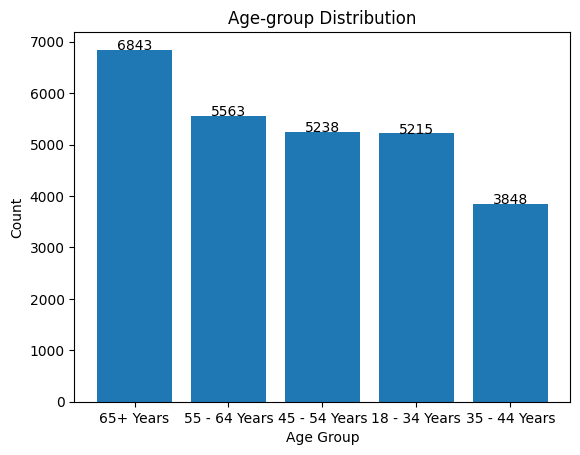

In [11]:
# finding unique values in AgeGroup feature
print("The unique categories in Age_Group feature are: \n\n", raw_train_features['age_group'].unique())
print("\n\nValue counts for each age group are: \n\n", raw_train_features['age_group'].value_counts())

# plotting bar chart of age group distribution
plt.bar(raw_train_features['age_group'].value_counts().index, raw_train_features["age_group"].value_counts().values)
plt.title("Age-group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
for i in range(len(raw_train_features['age_group'].value_counts().index)): # adding value counts on top of bars
    plt.text(i, raw_train_features["age_group"].value_counts().values[i], raw_train_features["age_group"].value_counts().values[i], ha = 'center')
plt.show()

The unique categories in Sex feature are: 

 ['Female' 'Male']


Value counts for each Sex are: 

 sex
Female    15858
Male      10849
Name: count, dtype: int64


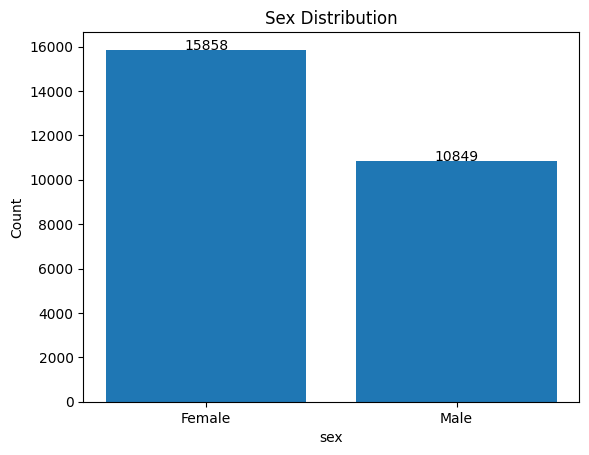

In [12]:
# finding unique values in Sex feature
print("The unique categories in Sex feature are: \n\n", raw_train_features['sex'].unique())
print("\n\nValue counts for each Sex are: \n\n", raw_train_features['sex'].value_counts())

# plotting bar chart of age group distribution
plt.bar(raw_train_features['sex'].value_counts().index, raw_train_features["sex"].value_counts().values)
plt.title("Sex Distribution")
plt.xlabel("sex")
plt.ylabel("Count")
for i in range(len(raw_train_features['sex'].value_counts().index)): # adding value counts on top of bars
    plt.text(i, raw_train_features["sex"].value_counts().values[i], raw_train_features["sex"].value_counts().values[i], ha = 'center')
plt.show()

The unique categories in Race feature are: 

 ['White' 'Black' 'Other or Multiple' 'Hispanic']


Value counts for each Race are: 

 race
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: count, dtype: int64


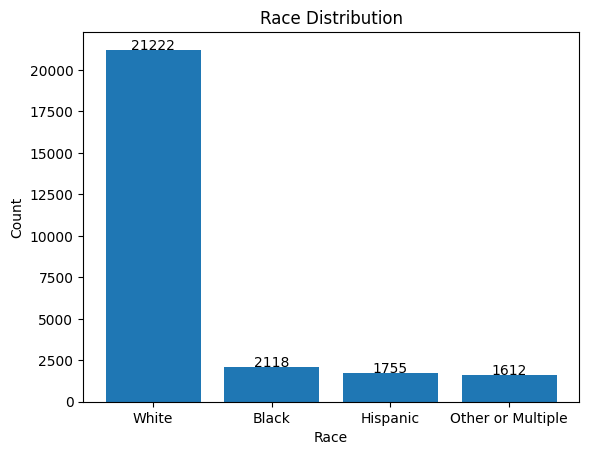

In [13]:
# finding unique values in Race feature
print("The unique categories in Race feature are: \n\n", raw_train_features['race'].unique())
print("\n\nValue counts for each Race are: \n\n", raw_train_features['race'].value_counts())

# plotting bar chart of age group distribution
plt.bar(raw_train_features['race'].value_counts().index, raw_train_features["race"].value_counts().values)
plt.title("Race Distribution")
plt.xlabel("Race")
plt.ylabel("Count")
for i in range(len(raw_train_features['race'].value_counts().index)): # adding value counts on top of bars
    plt.text(i, raw_train_features["race"].value_counts().values[i], raw_train_features["race"].value_counts().values[i], ha = 'center')
plt.show()

Census MSA: Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

Definition: "An MSA consists of one or more counties that contain a city of 50,000 or. more inhabitants, or contain a Census Bureau-defined urbanized area (UA)"

- The general concept of a metropolitan or micropolitan statistical area is that of a core area containing a substantial population nucleus, together with adjacent communities having a high degree of economic and social integration with that core.
- If specified criteria are met, a metropolitan statistical area containing a single core with a population of 2.5 million or more may be subdivided to form smaller groupings of counties referred to as "metropolitan divisions."
- The term "core based statistical area" (CBSA) became effective in 2000 and refers collectively to metropolitan and micropolitan statistical areas.
- The largest city in each metropolitan or micropolitan statistical area is designated a "principal city." Additional cities qualify if specified requirements are met concerning population size and employment. 
- The title of each metropolitan or micropolitan statistical area consists of the names of up to three of its principal cities and the name of each state into which the metropolitan or micropolitan statistical area extends. 
- Titles of metropolitan divisions also typically are based on principal city names but in certain cases consist of county names.

The unique categories in census_msa feature are: 

 ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


Value counts for each census_msa region are: 

 census_msa
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: count, dtype: int64


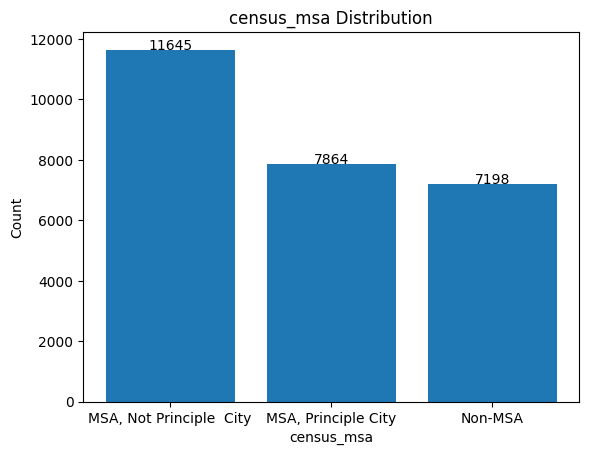

In [14]:
# finding unique values in Census_MSA feature
print("The unique categories in census_msa feature are: \n\n", raw_train_features['census_msa'].unique())
print("\n\nValue counts for each census_msa region are: \n\n", raw_train_features['census_msa'].value_counts())

# plotting bar chart of age group distribution
plt.bar(raw_train_features['census_msa'].value_counts().index, raw_train_features["census_msa"].value_counts().values)
plt.title("census_msa Distribution")
plt.xlabel("census_msa")
plt.ylabel("Count")
for i in range(len(raw_train_features['census_msa'].value_counts().index)): # adding value counts on top of bars
    plt.text(i, raw_train_features["census_msa"].value_counts().values[i], raw_train_features["census_msa"].value_counts().values[i], ha = 'center')
plt.show()

The unique categories in hhs_geo_region feature are: 

 ['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']


Value counts for each hhs_geo_region region are: 

 hhs_geo_region
lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: count, dtype: int64


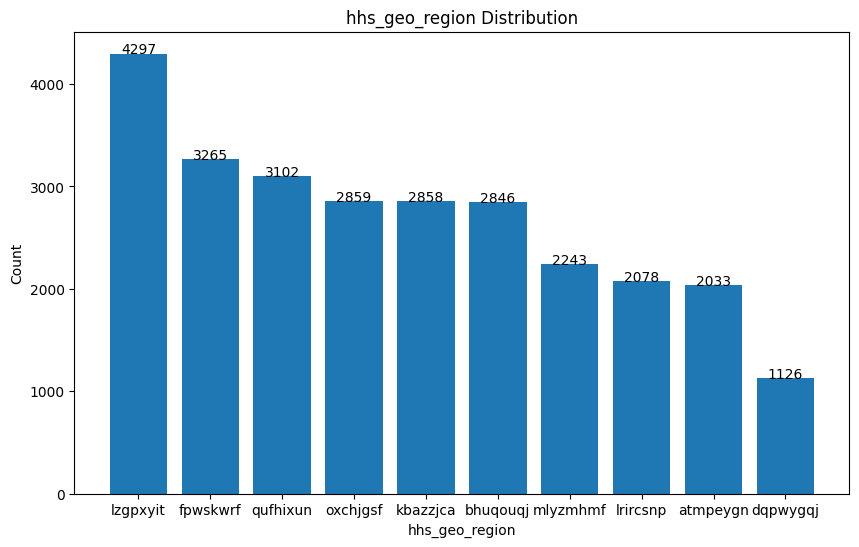

In [15]:
# finding unique values in hhs_geo_region feature
print("The unique categories in hhs_geo_region feature are: \n\n", raw_train_features['hhs_geo_region'].unique())
print("\n\nValue counts for each hhs_geo_region region are: \n\n", raw_train_features['hhs_geo_region'].value_counts())

# plotting bar chart of age group distribution
plt.figure(figsize=(10,6))
plt.bar(raw_train_features['hhs_geo_region'].value_counts().index, raw_train_features["hhs_geo_region"].value_counts().values, 0.8)
plt.title("hhs_geo_region Distribution")
plt.xlabel("hhs_geo_region")
# x_labels = ["Region 1", "Region 2", "Region 3", "Region 4", "Region 5", "Region 6", "Region 7", "Region 8", "Region 9", "Region 10"]
# plt.xticks(np.arange(len(x_labels)), x_labels, color="black")
plt.ylabel("Count")
for i in range(len(raw_train_features['hhs_geo_region'].value_counts().index)): # adding value counts on top of bars
    plt.text(i, raw_train_features["hhs_geo_region"].value_counts().values[i], raw_train_features["hhs_geo_region"].value_counts().values[i], ha = 'center')
plt.show()

In [16]:
"""Behavioural Face Mask vs Sex"""

fig = px.bar(raw_train_features, x = 'sex', y = 'behavioral_face_mask', color = 'age_group')
fig.show()

In [17]:
## Combining training features with target variables
complete_df = pd.concat([raw_train_features, raw_train_labels], axis = 1)
complete_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [ ]:
# visualizing target variables with 